## Introduction
In this notebook, we have mainly focused on analyzing previous_application.csv i.e. data about previous application of an applicant.

### Approach

For the Exploratory data analysis, mention steps have been followed.
- Import modules
- Read the dataset
- Data Cleaning 
  1. Missing value handling 
  2. Type Casting
  3. Fixing rows and columns - removing unnecessary rows/columns (Missing value handling and coorelation)
  4. Handling outliers
- Univariate Analysis
- Bivariate analysis and Multivariate analysis


## Importing the modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the datasets

In [3]:
application_df = pd.read_csv('application_data.csv')
prev_ap_df = pd.read_csv('previous_application.csv')

In [4]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
prev_ap_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
application_df.shape

(307511, 122)

In [9]:
prev_ap_df.shape

(1670214, 37)

### About the columns 
- previous_application contains 37 features (15 are float, 6 are int, 16 are object datatype).
- application_data contains 122 columns (65 are float, 41 are int, 16 are object datatype and 1 target variable).

In [10]:
# Finding common columns in pervious application and application datasets
additional_col = []
common_col = []

for col in application_df.columns:
    if col in prev_ap_df.columns:
        common_col.append(col)
    else:
        additional_col.append(col)
print(len(additional_col))
print(len(common_col))
print(common_col)

114
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


#####  comment
SK_ID_CURR is unique identifier, which can be used to merge 2 datasets

## Data Cleaning

In [11]:
# Function name = missingdata_percentage
# Usage = Returns % of missing values for all freatures in a dataframe
# Arguments = dataframe
# Returns = a dataframe containing categories and % of missing values

def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for i in df.columns:
        if df[i].isna().values.any():
            percentage = 100*df[i].isna().sum()/len(df[i])
            missing = missing.append({'category': i , 'percentage': percentage}, ignore_index=True)
    return missing

In [12]:
missingdata_percentage(prev_ap_df).sort_values('percentage',ascending= False)

,category,percentage
5,RATE_INTEREST_PRIMARY,99.643698
6,RATE_INTEREST_PRIVILEGED,99.643698
2,AMT_DOWN_PAYMENT,53.63648
4,RATE_DOWN_PAYMENT,53.63648
7,NAME_TYPE_SUITE,49.119754
10,DAYS_FIRST_DRAWING,40.298129
11,DAYS_FIRST_DUE,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,40.298129
13,DAYS_LAST_DUE,40.298129
14,DAYS_TERMINATION,40.298129


#### Observations:
There are 16 features in in previous application dataset having missing values 
here RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED have 99% null values so we will drop these columns and PRODUCT_COMBINATION, AMT_CREDIT have less than 2% missing values so we will remove that rows of these columns


In [13]:
prev_ap_df.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
prev_ap_df.dropna(subset=['PRODUCT_COMBINATION','AMT_CREDIT'], inplace= True)

prev_ap_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [14]:
# Extracting the numeric features of prev_ap_df

numeric_features = []
for i in prev_ap_df.columns:
    if prev_ap_df[i].dtype == float or prev_ap_df[i].dtype == int:
        numeric_features.append(i)

print(numeric_features)
        

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [15]:
prev_num_df = pd.DataFrame()

for i in numeric_features:
    prev_num_df[i]=prev_ap_df[i]
    
prev_num_df.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,17145.0,0.0,17145.0,0.0,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,25188.615,607500.0,679671.0,NaN,607500.0,NaN,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,136444.5,NaN,112500.0,NaN,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,47041.335,450000.0,470790.0,NaN,450000.0,NaN,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,31924.395,337500.0,404055.0,NaN,337500.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
prev_num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297978 non-null  float64
 1   AMT_APPLICATION            1669867 non-null  float64
 2   AMT_CREDIT                 1669867 non-null  float64
 3   AMT_DOWN_PAYMENT           774370 non-null   float64
 4   AMT_GOODS_PRICE            1284699 non-null  float64
 5   RATE_DOWN_PAYMENT          774370 non-null   float64
 6   CNT_PAYMENT                1297983 non-null  float64
 7   DAYS_FIRST_DRAWING         997149 non-null   float64
 8   DAYS_FIRST_DUE             997149 non-null   float64
 9   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 10  DAYS_LAST_DUE              997149 non-null   float64
 11  DAYS_TERMINATION           997149 non-null   float64
 12  NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
dtypes: float64(1

<AxesSubplot:>

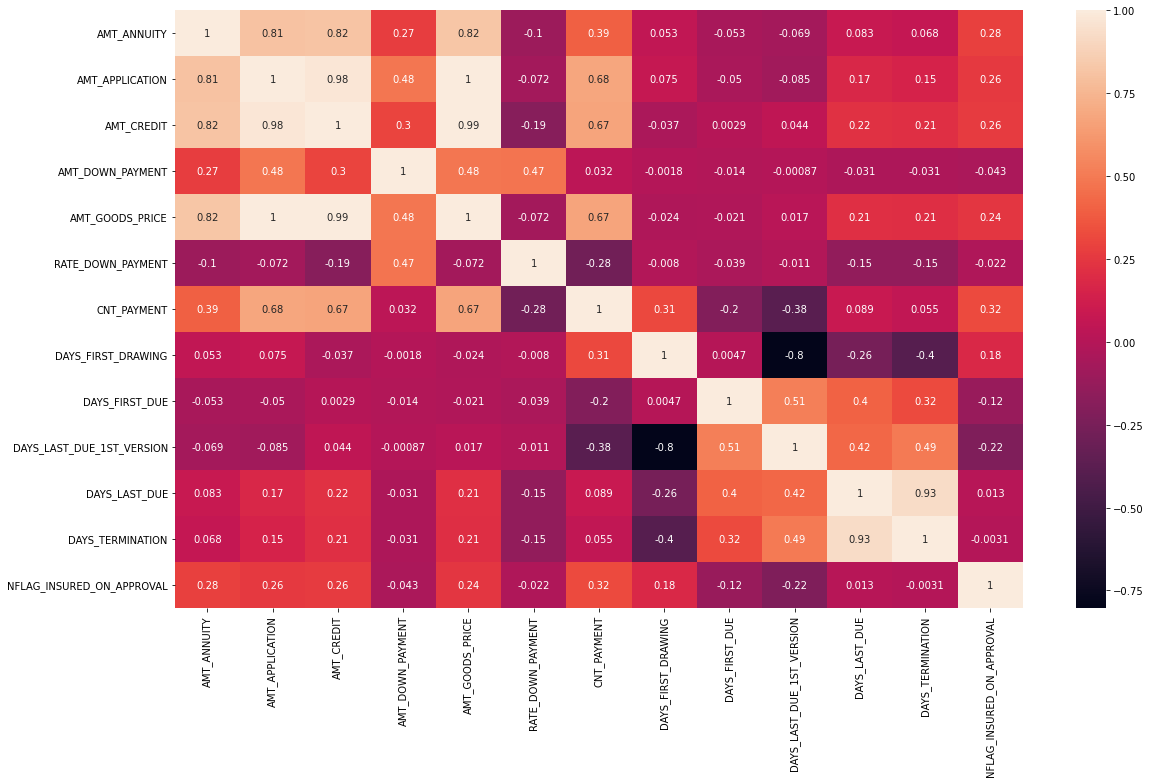

In [17]:
# Cheaking the coorelation between numeric features of pervious application data

plt.figure(figsize=(19,11))
sns.heatmap(prev_num_df.corr(), annot=True)

### Comment:

- 'DAYS_LAST_DUE' and 'DAYS_TERMINATION' are highly correlated
- 'DAYS_FIRST_DRAWING' and 'DAYS_LAST_DUE_1st_VERSION' have high negative correlation
- 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' are highly correlated
The features can be removed before modelling this data, as they would cause collinearity 
###### 'DAYS_TERMINATION','DAYS_LAST_DUE_1st_VERSION','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' For EDA purpose we are not removing them.

- 'SK_ID_PREV' column is not required for analysis.

In [18]:
prev_ap_df.drop(['SK_ID_PREV'],axis=1, inplace=True)

In [21]:
prev_ap_df.isnull().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    371889
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               895497
AMT_GOODS_PRICE                385168
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              895497
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820058
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    371884
NAME_YIELD_G

In [22]:
prev_ap_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [23]:
# Filling missing values as Unaccompanied is most common value
prev_ap_df['NAME_TYPE_SUITE'].fillna(prev_ap_df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [25]:
# Merging only required columns of application data with pervious data i.e 'SK_ID_CURR', 'TARGET' to know wheather particular applicant had recieved loan or not

prev_ap_merged = pd.merge(application_df[['SK_ID_CURR', 'TARGET']], prev_ap_df, how='left', on=['SK_ID_CURR'])

prev_ap_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429841 entries, 0 to 1429840
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1429841 non-null  int64  
 1   TARGET                       1429841 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413387 non-null  object 
 3   AMT_ANNUITY                  1106482 non-null  float64
 4   AMT_APPLICATION              1413387 non-null  float64
 5   AMT_CREDIT                   1413387 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413387 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413387 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413387 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413387 non-null  float64
 12  RATE_DOWN_PAYMENT            664161 non-nu

In [26]:
prev_ap_merged.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.429841e+06,1.429841e+06,1.106482e+06,1.413387e+06,1.413387e+06,6.641610e+05,1.094176e+06,1.413387e+06,1.413387e+06,664161.000000,1.413387e+06,1.413387e+06,1.106487e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784721e+05,8.621658e-02,1.583720e+04,1.752825e+05,1.963976e+05,6.655317e+03,2.264512e+05,1.247888e+01,9.964313e-01,0.080175,-8.804742e+02,3.150476e+02,1.605195e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028026e+05,2.806837e-01,1.472491e+04,2.936432e+05,3.195033e+05,2.062030e+04,3.159376e+05,3.331533e+00,5.963220e-02,0.107784,7.835932e+02,7.695935e+03,1.456674e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893620e+05,0.000000e+00,6.257880e+03,1.975500e+04,2.491200e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,-1.314000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789590e+05,0.000000e+00,1.122376e+04,7.090200e+04,8.064000e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675110e+05,0.000000e+00,2.042111e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Handling Outiers

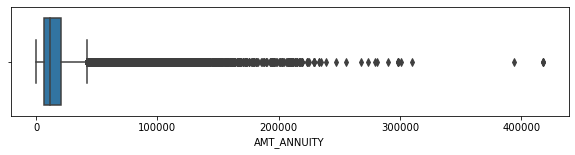

In [28]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'])
plt.show()

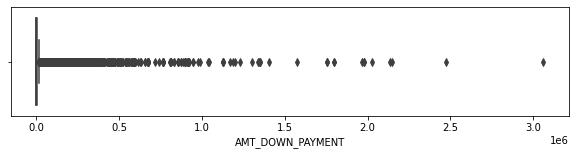

In [29]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'])
plt.show()

In [32]:
# Excluding values outside 99%ile for AMT_ANNUITY and AMT_DOWN_PAYMENT

prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_ANNUITY'] < np.nanpercentile(prev_ap_merged['AMT_ANNUITY'],99)]
prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_DOWN_PAYMENT'] < np.nanpercentile(prev_ap_merged['AMT_DOWN_PAYMENT'],99)]


Cheaking the featrues after updating 

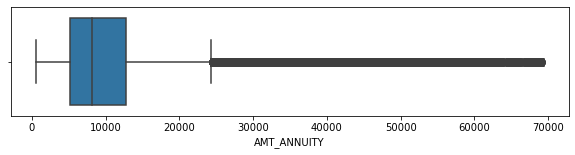

In [33]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'])
plt.show()

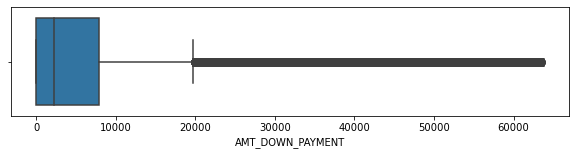

In [34]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'])
plt.show()

### Cheaking Data imbalance in Previous application data

<AxesSubplot:title={'center':'Status of Previous loan application and payment'}, xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

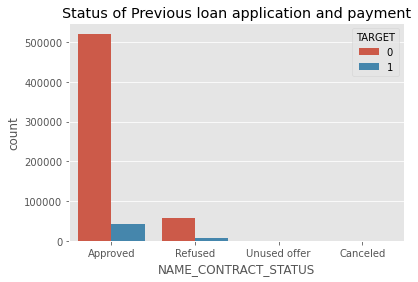

In [41]:
plt.style.use('ggplot')
plt.title('Status of Previous loan application and payment')
sns.countplot(prev_ap_merged['NAME_CONTRACT_STATUS'], hue=prev_ap_merged['TARGET'])

In [47]:
# Percentage of pervious approved loans applicants that defaulted in current loan 

total_approved = len(prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == 'Approved'])
default_approved = len(prev_ap_merged[(prev_ap_merged['TARGET'] == 1) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == 'Approved')])

print('Percentage of pervious loan applicant that defaulted in current loan',(default_approved*100/total_approved))


Percentage of pervious loan applicant that defaulted in current loan 7.354523610066182


In [48]:
# Percentage of pervious refused loans applicants that were able to pay current loan 

total_refused = len(prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == 'Refused'])
nondefault_refused = len(prev_ap_merged[(prev_ap_merged['TARGET'] == 0) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == 'Refused')])

print('Percentage of previously refused loan applicants that were able to pay current loan', (nondefault_refused*100/total_refused))


Percentage of previously refused loan applicants that were able to pay current loan 90.18283846699349


#### Observations :

- The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected.
- 7 % of pervious approved loan applicant defaulted in current loan.
- 90 % of pervious approved loan applicant were able to pay current loan.

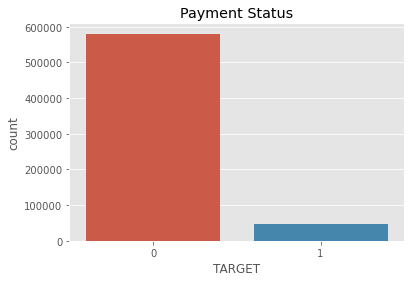

In [50]:
plt.title('Payment Status')
sns.countplot(prev_ap_merged['TARGET'])
plt.show()

##### Comment :
This data is highly imbalenced as the no of defaulters is very low in total population.

## Analysis of Numeric data of Previous application data

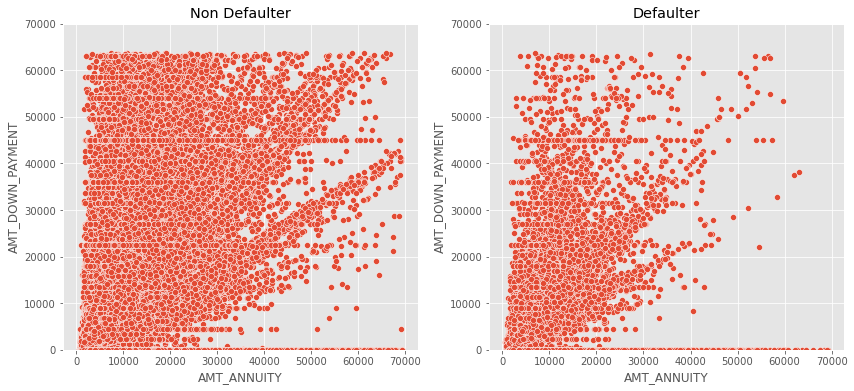

In [66]:
# Setting equal y-limit for both sub-plots for better comparison

fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1,2,1, ylim=(0,70000), title='Non Defaulter')
ax2 = fig.add_subplot(1,2,2, ylim=(0,70000), title='Defaulter')

sns.scatterplot(prev_ap_merged[prev_ap_merged['TARGET']==0]['AMT_ANNUITY'],prev_ap_merged[prev_ap_merged['TARGET']==0]['AMT_DOWN_PAYMENT'], ax=ax1)
sns.scatterplot(prev_ap_merged[prev_ap_merged['TARGET']==1]['AMT_ANNUITY'],prev_ap_merged[prev_ap_merged['TARGET']==1]['AMT_DOWN_PAYMENT'], ax=ax2)

plt.show()

#### Comments :
- Number of defaulters are less for larger amount of annuity of previous application.
- For higher downpayment, default cases are less.

<AxesSubplot:title={'center':'Defaulter'}, xlabel='RATE_DOWN_PAYMENT'>

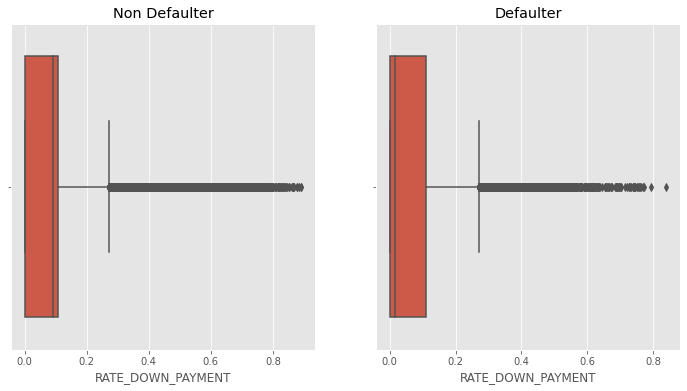

In [68]:
# Analysis with respect to rate of downpayment
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title = 'Non Defaulter')
ax2 = fig.add_subplot(1,2,2, title = 'Defaulter')

sns.boxplot(prev_ap_merged[prev_ap_merged['TARGET']==0]['RATE_DOWN_PAYMENT'], ax=ax1)
sns.boxplot(prev_ap_merged[prev_ap_merged['TARGET']==1]['RATE_DOWN_PAYMENT'], ax=ax2)

Cheaking values of quantiles 

In [69]:
# percentile of rate f downpayment for non-defaulters

prev_ap_merged[prev_ap_merged['TARGET']==0]['RATE_DOWN_PAYMENT'].quantile([0.5,0.7,0.9,0.95,0.99])

0.50    0.091255
0.70    0.108909
0.90    0.211895
0.95    0.282832
0.99    0.498074
Name: RATE_DOWN_PAYMENT, dtype: float64

In [70]:
# percentile of rate f downpayment for non-defaulters

prev_ap_merged[prev_ap_merged['TARGET']==1]['RATE_DOWN_PAYMENT'].quantile([0.5,0.7,0.9,0.95,0.99])

0.50    0.017238
0.70    0.104260
0.90    0.199685
0.95    0.232643
0.99    0.454294
Name: RATE_DOWN_PAYMENT, dtype: float64

#### Comment :
- For those how have lower rate of downpayment in previous application, cases of default are higher.

## Analysis of Categorical Features of Previous application data

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

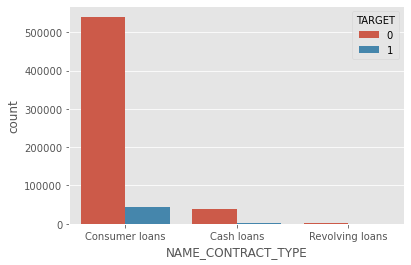

In [73]:
sns.countplot(prev_ap_merged['NAME_CONTRACT_TYPE'], hue=prev_ap_merged['TARGET'])


#### Comments :
- Highest number of loans are applied for consumer loans

<AxesSubplot:xlabel='CODE_REJECT_REASON', ylabel='count'>

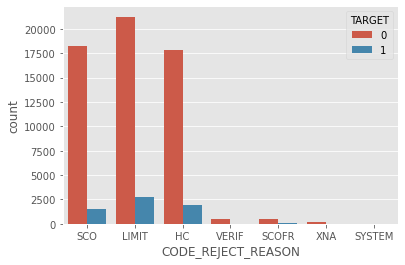

In [75]:
sns.countplot(prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == 'Refused']['CODE_REJECT_REASON'], hue=prev_ap_merged['TARGET'])


#### Comment :
- As seen from the above plot the most commom reason for loan rejection is 'SCO', 'LIMIT' and 'HC'

<AxesSubplot:xlabel='NFLAG_INSURED_ON_APPROVAL', ylabel='count'>

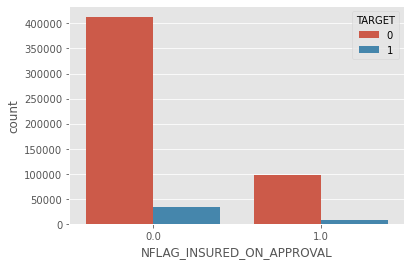

In [76]:
sns.countplot(prev_ap_merged['NFLAG_INSURED_ON_APPROVAL'], hue=prev_ap_merged['TARGET'])

#### Comment :
- Most of the applicants did not requested insurence during previous loan application.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'XNA'),
  Text(1, 0, 'Cash through the bank'),
  Text(2, 0, 'Non-cash from your account'),
  Text(3, 0, 'Cashless from the account of the employer')])

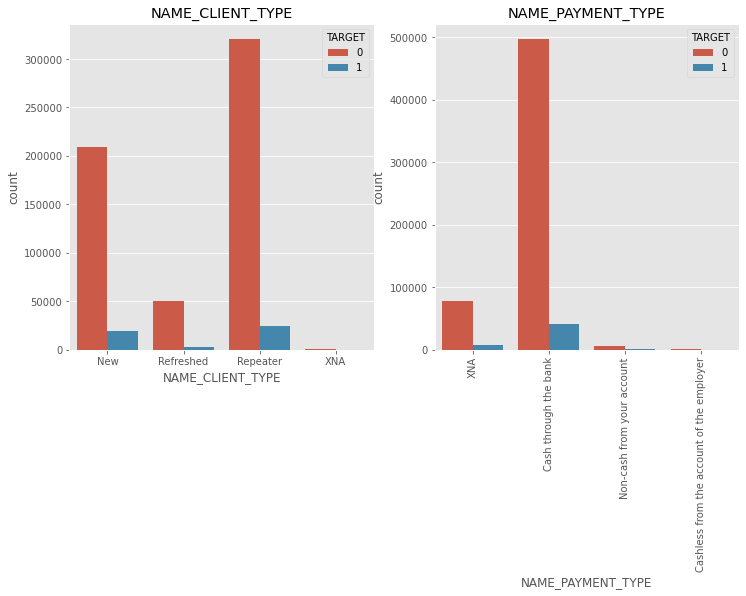

In [83]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title = 'NAME_CLIENT_TYPE')
ax2 = fig.add_subplot(1,2,2, title = 'NAME_PAYMENT_TYPE')

sns.countplot(prev_ap_merged['NAME_CLIENT_TYPE'], hue=prev_ap_merged['TARGET'], ax=ax1)
sns.countplot(prev_ap_merged['NAME_PAYMENT_TYPE'], hue=prev_ap_merged['TARGET'], ax=ax2)
plt.xticks(rotation=90)


#### Comment:

- Most of the applicants are repeater.
- 'Cash through the bank' is the most frequently used payment method

In [84]:
# This functions gives us the percentage of defaulter with respect to category
# example = If there are 100 applicant whose'NAME_GOODS_CATEGORY is Insurance and 10 of them defaults then the percentat=ge will be 10%

def values_wise_default_percentage(df, col):
    new_df = pd.DataFrame(columns=['Values', 'Count of Value', 'Percentage of Defaulters'])
    for i in df[col].unique():
        default_cnt = len(df[(df[col]==i) & (df['TARGET']==1)])
        total_cnt = len(df[df[col]==i])
        new_df = new_df.append({'Values':i ,'Count of Value':total_cnt ,'Percentage of Defaulters':(default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulters', ascending=False)



In [85]:
values_wise_default_percentage(prev_ap_merged,'NAME_GOODS_CATEGORY')

,Values,Count of Value,Percentage of Defaulters
23,Insurance,57,10.526316
0,Vehicles,2564,10.25741
14,Jewelry,5074,9.124951
17,Auto Accessories,5947,9.029763
3,Mobile,172634,8.615336
15,Office Appliances,1950,8.307692
8,Computers,84106,8.074335
20,Weapon,62,8.064516
21,Direct Sales,324,8.024691
5,Audio/Video,82949,7.698706


#### Comment:

- Highest percentage of default cases are for the applicants who previously applied for Insurance and Vehicles

In [86]:
values_wise_default_percentage(prev_ap_merged,'NAME_PORTFOLIO')

,Values,Count of Value,Percentage of Defaulters
2,Cards,2097,17.119695
0,POS,585549,7.666139
1,Cash,40536,6.384448
3,Cars,11,0.0


#### Comment: 
- For Cards defaulter rate is highest.

In [89]:
values_wise_default_percentage(prev_ap_merged, 'CHANNEL_TYPE')

,Values,Count of Value,Percentage of Defaulters
4,AP+ (Cash loan),60,15.0
1,Country-wide,346123,7.908171
2,Regional / Local,82860,7.551291
0,Stone,171097,7.294692
3,Credit and cash offices,28020,6.124197
5,Contact center,22,4.545455
6,Car dealer,11,0.0


#### Comment:

- 15% loan applicatiant defaulted for AP+ (Cash Loan)

In [90]:
values_wise_default_percentage(prev_ap_merged, 'NAME_SELLER_INDUSTRY')

,Values,Count of Value,Percentage of Defaulters
0,Auto technology,3735,10.522088
9,Jewelry,2029,9.019221
3,Connectivity,186581,8.780637
2,Consumer electronics,303275,7.451983
7,Industry,15364,7.211664
4,Construction,24070,6.597424
5,XNA,28844,6.226598
1,Furniture,44949,5.924492
6,Clothing,18387,5.857399
8,Tourism,293,4.778157


#### Comment:

- In seller Industry "Auto technology" has highest rate of defaulter MLM partners has lowest number of defaulters

In [91]:
values_wise_default_percentage(prev_ap_merged, 'NAME_YIELD_GROUP')

,Values,Count of Value,Percentage of Defaulters
4,XNA,2097,17.119695
2,high,231317,8.340935
1,middle,182149,7.558098
0,low_normal,153967,6.844973
3,low_action,58663,6.608936


#### Comment:

- Defaulter percentage is highest where NAME_YIELD_GROUP is not known.

In [92]:
values_wise_default_percentage(prev_ap_merged, 'PRODUCT_COMBINATION')

,Values,Count of Value,Percentage of Defaulters
13,Card Street,2082,17.195005
4,POS mobile with interest,164729,8.761056
0,POS other with interest,18609,7.953141
3,POS mobile without interest,19877,7.888514
2,POS household with interest,218649,7.752151
11,POS others without interest,2081,7.256127
15,Card X-Sell,15,6.666667
5,POS household without interest,71330,6.649376
9,Cash Street: middle,8818,6.475391
10,Cash Street: high,19836,6.417625


#### Comment:
- Highest percentage of default cases is for Card Street


## Conclusion:

1. There are feature columns in the dataset that are highly correlated to each other. Which means both will have similar impact on the target value. Those features can be removed before feeding this data to a model to avoid collinearity.

2. Feature columns with 50% or more missing data can be dropped.

Following columns should be converted to integer. DAYS_FIRST_DRAWING float64 DAYS_FIRST_DUE float64 DAYS_LAST_DUE_1ST_VERSION float64 DAYS_LAST_DUE float64 DAYS_TERMINATION float64

This categorical column has only 0 and 1 and hence can be converted into integer column. NFLAG_INSURED_ON_APPROVAL float64

1. This dataset is highly imbalanced

2. The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected. NAME_CONTRACT_STATUS is an important feature.

- 7% of the previously approved loan applicants that defaulted in current loan
- 90 % of the previously refused loan applicants that were able to pay current loan
- 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection.

- Most of the people did not request insurance during previous loan application.

- For "Cards" defaulter percentage is highest (17%). 'NAME_PORTFOLIO' is an important feature for analyzing 'TARGET' variable.

- 15% loan applicatiant defaulted for AP+ (Cash Loan). 'CHANNEL_TYPE' is an important feature for analyzing 'TARGET' variable.

- Highest percentage (17%) of default cases is for 'Card Street'. 'PRODUCT_COMBINATION' is an important driving factor.